# Instructions
Use the automotive data set to perform the following:
1.Identify a likely distribution for price and several other features.
2.Compute basic summary statistics by both classical, bootstrap and Bayesian methods
3.Compute confidence intervals for the above summary statistics by classical, bootstrap and Bayesian methods
4.Correctly use hypothesis tests to determine if the differences in pairs and multiple populations are significant:
Classical tests
Tukey’s Honest Significant Differences (HSD)
Bootstrap methods
Bayesian model


# Load and set up the data

In [24]:
# Load necessary libraries
import pandas as pd
import scipy.stats as ss
from scipy.stats import norm
import numpy.random as nr
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mean
from scipy import stats
import statsmodels.stats.weightstats as ws
import statsmodels.stats.power as smsp
import numpy as np
from math import sqrt
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from operator import add
import math
from sklearn.preprocessing import scale

# Cleaned up Dataset location
fileName = "https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/Automobile%20price%20data%20_Raw_.csv"

# Read the .csv file with the pandas read_csv method
energy = pd.read_csv(fileName)

In [25]:
# clean up data

## Remove rows with missing values, accounting for mising values coded as '?'
cols = ['price', 'bore', 'stroke', 
      'horsepower', 'peak-rpm']
for column in cols:
    energy.loc[energy[column] == '?', column] = np.nan
    energy.dropna(axis = 0, inplace = True)

## Convert some columns to numeric values
for column in cols:
    energy[column] = pd.to_numeric(energy[column])

# 1. Likely distributions
Identify a likely distribution for price and several other features.

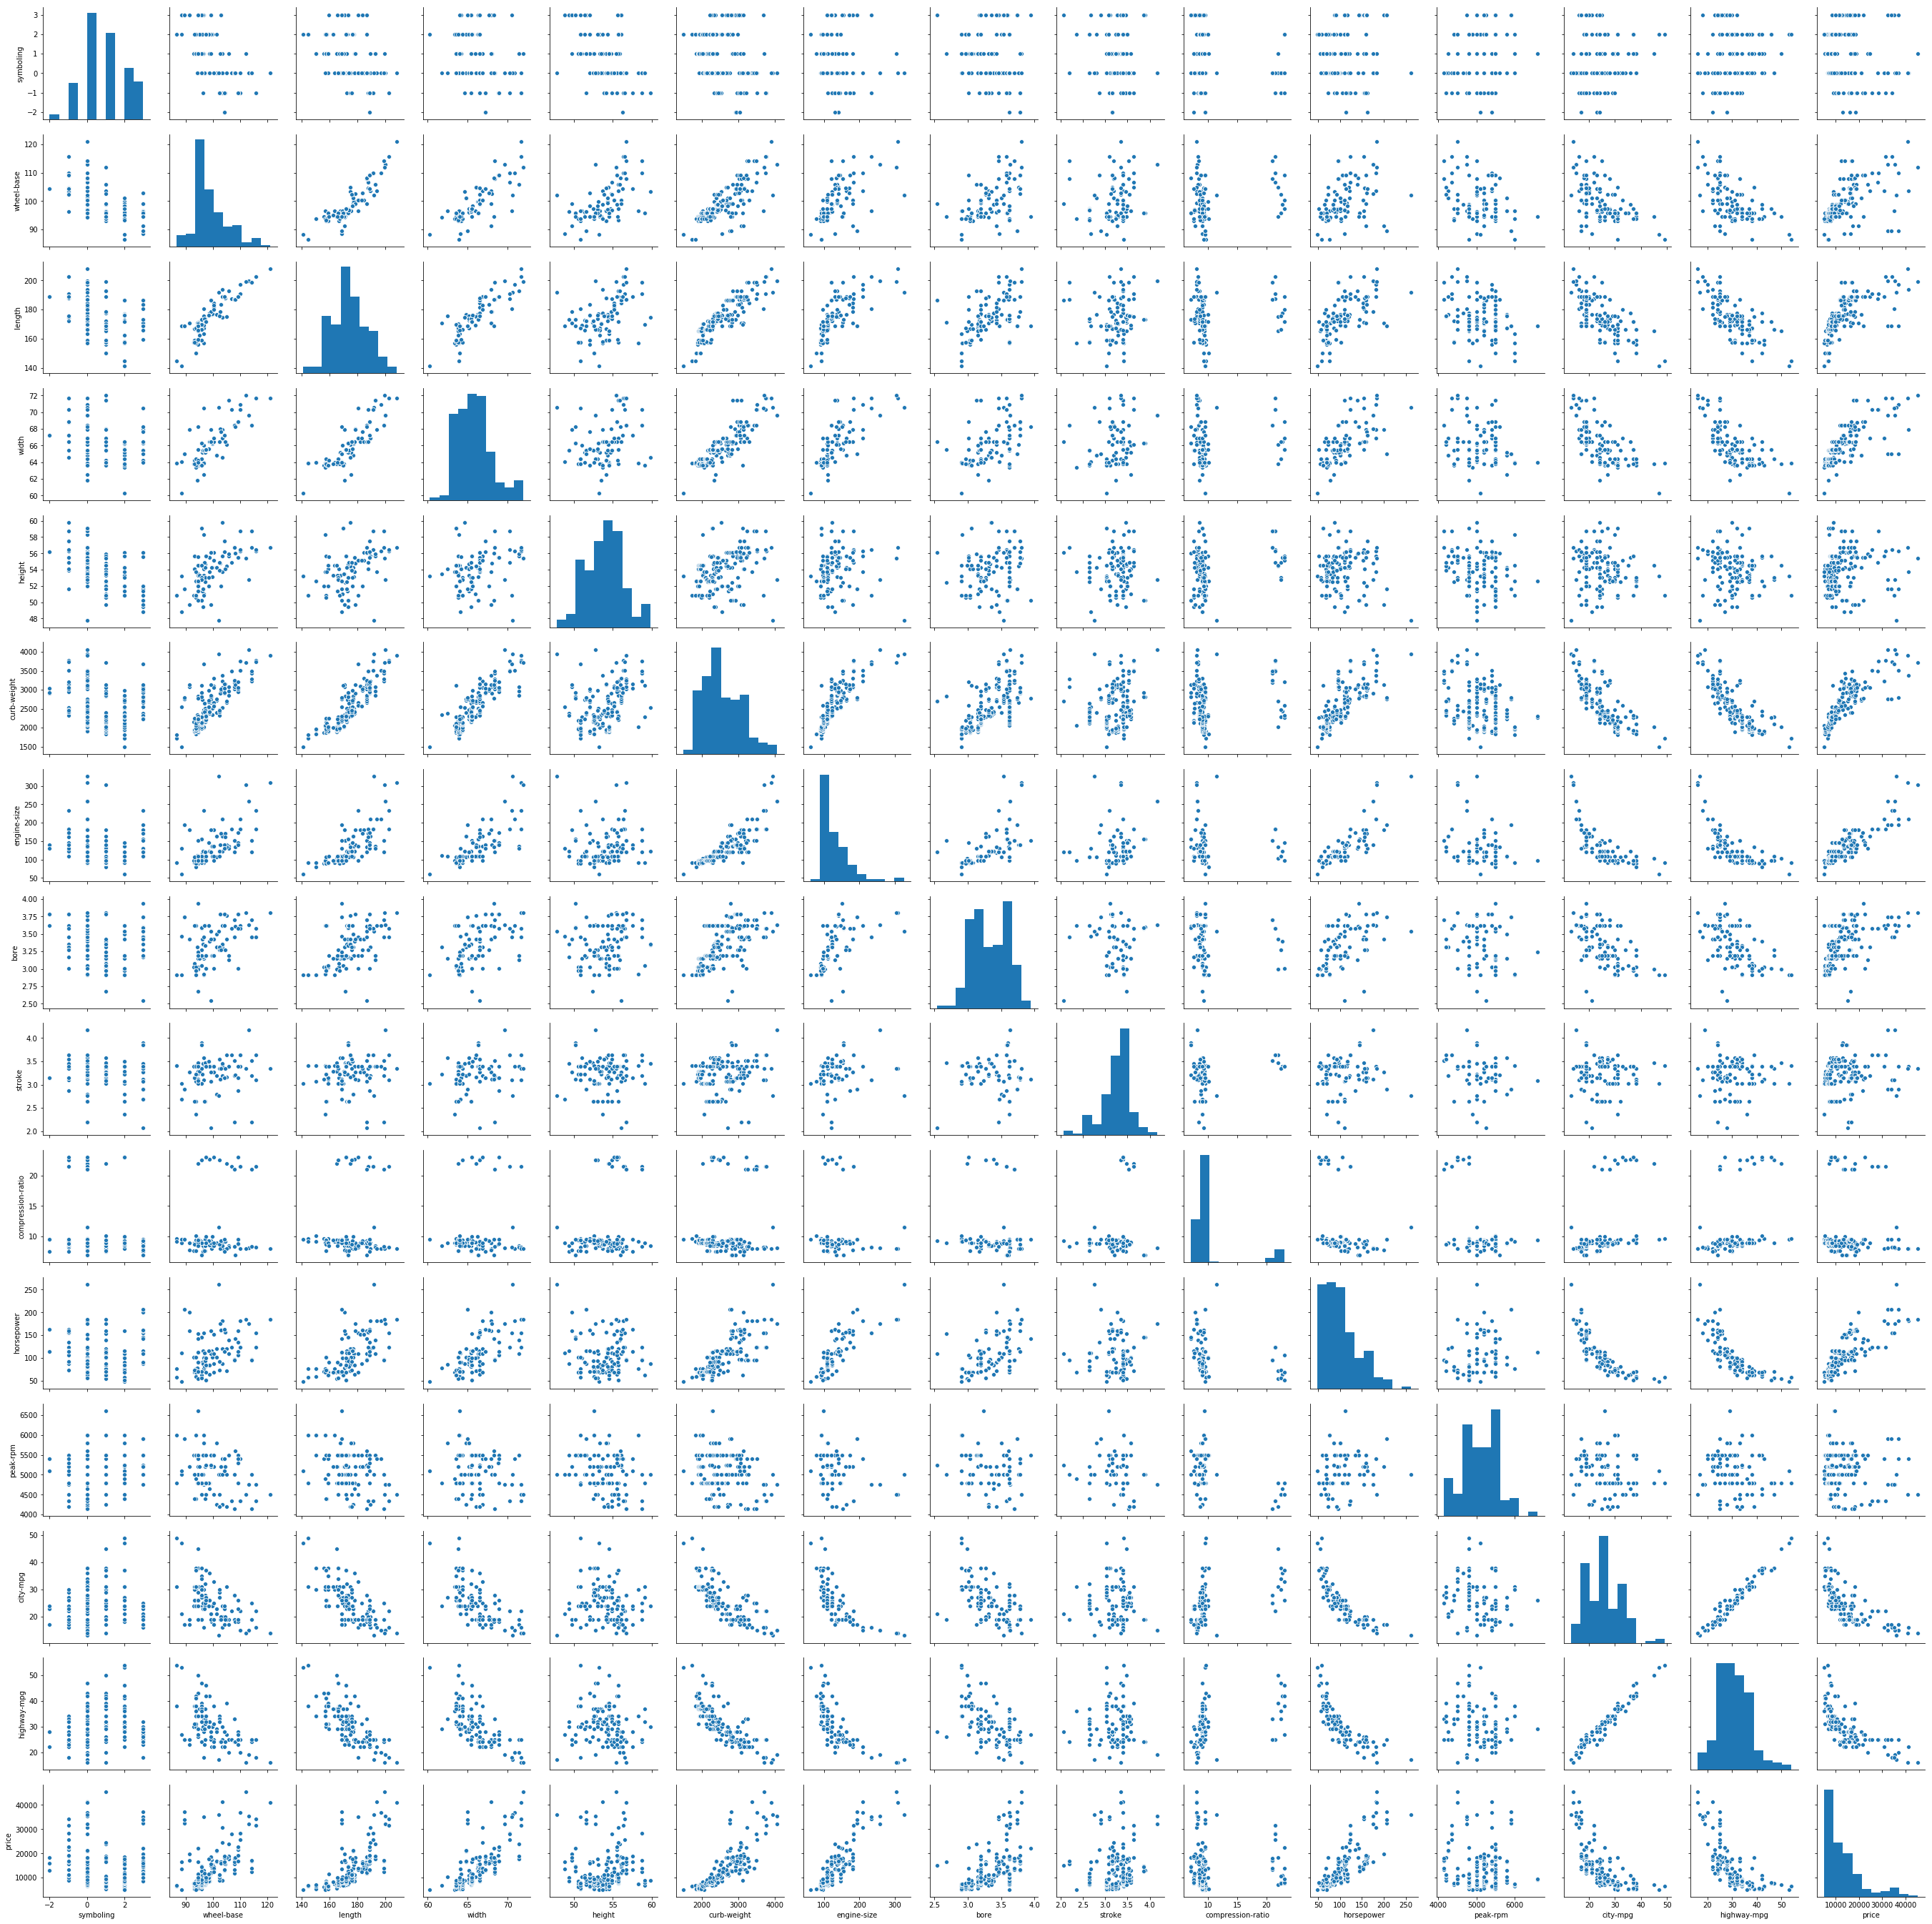

In [26]:
sns.pairplot(energy)

In [27]:
# size = len(energy.price)
# x = energy.index
# y = energy.price
# h = plt.hist(y, bins=range(48), color='w')

dist_names = ['norm']

# for dist_name in dist_names:
#     dist = getattr(stats, dist_name)
#     param = dist.fit(y)
#     pdf_fitted = dist.pdf(x, *param[:-2], loc=param[-2], scale=param[-1]) * size
#     plt.plot(pdf_fitted, label=dist_name)
#     plt.xlim(0,47)
# plt.legend(loc='upper right')
# plt.show()

for dist_name in dist_names:
    statistic, pvalue = stats.kstest(energy.loc[:, 'price'], dist_name)
    print(dist_name, 'Kolmogorov-Simirnov statistic =', statistic, 'p-value =', pvalue)


norm Kolmogorov-Simirnov statistic = 1.0 p-value = 0.0


In [28]:
energy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195 entries, 0 to 204
Data columns (total 26 columns):
symboling            195 non-null int64
normalized-losses    195 non-null object
make                 195 non-null object
fuel-type            195 non-null object
aspiration           195 non-null object
num-of-doors         195 non-null object
body-style           195 non-null object
drive-wheels         195 non-null object
engine-location      195 non-null object
wheel-base           195 non-null float64
length               195 non-null float64
width                195 non-null float64
height               195 non-null float64
curb-weight          195 non-null int64
engine-type          195 non-null object
num-of-cylinders     195 non-null object
engine-size          195 non-null int64
fuel-system          195 non-null object
bore                 195 non-null float64
stroke               195 non-null float64
compression-ratio    195 non-null float64
horsepower           195 non-n

2. Summary Statistics
Compute basic summary statistics by both classical, bootstrap, and Bayesian methods

In [29]:
# classical
energy.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,0.794872,98.896410,174.256923,65.886154,53.861538,2559.000000,127.938462,3.329385,3.250308,10.194974,103.271795,5099.487179,25.374359,30.841026,13248.015385
std,1.230612,6.132038,12.476443,2.132484,2.396778,524.715799,41.433916,0.271866,0.314115,4.062109,37.869730,468.271381,6.401382,6.829315,8056.330093
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.050000,52.000000,2145.000000,98.000000,3.150000,3.110000,8.500000,70.000000,4800.000000,19.500000,25.000000,7756.500000
50%,1.000000,97.000000,173.200000,65.400000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5100.000000,25.000000,30.000000,10245.000000
75%,2.000000,102.400000,184.050000,66.900000,55.650000,2943.500000,145.500000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,35.000000,16509.000000
max,3.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


In [30]:
# bootstrap
sample = energy.sample(frac=1.0, replace=True)
sample.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,0.753846,98.730769,173.659487,65.753846,53.911282,2533.969231,126.035897,3.301692,3.229077,10.266256,101.692308,5085.897436,25.394872,30.825641,13032.225641
std,1.188833,6.136974,12.361182,2.115316,2.342784,524.229881,41.371509,0.280661,0.309925,4.205936,37.664521,478.257781,5.893643,6.291080,8326.314376
min,-2.000000,88.600000,150.000000,63.400000,48.800000,1876.000000,90.000000,2.540000,2.070000,7.000000,52.000000,4150.000000,14.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.000000,52.000000,2145.000000,97.000000,3.040000,3.090000,8.600000,69.000000,4800.000000,21.000000,26.000000,7603.000000
50%,1.000000,96.900000,172.000000,65.400000,54.100000,2385.000000,110.000000,3.270000,3.270000,9.000000,92.000000,5000.000000,26.000000,31.000000,9298.000000
75%,1.000000,102.400000,182.400000,66.500000,55.650000,2828.500000,141.000000,3.580000,3.400000,9.400000,116.000000,5500.000000,30.500000,36.500000,16558.000000
max,3.000000,120.900000,208.100000,71.700000,59.800000,4066.000000,308.000000,3.800000,4.170000,23.000000,207.000000,6600.000000,38.000000,46.000000,41315.000000


In [36]:
#Bayes
energy.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
